In [5]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [6]:
df = pd.read_excel("Bookstore.xls")
engineering = df.loc[df['Category'] == 'Engineering']

In [7]:
engineering['Order Date'].min()

Timestamp('2014-01-06 00:00:00')

In [8]:
engineering['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

In [9]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
engineering.drop(cols, axis=1, inplace=True)
engineering = engineering.sort_values('Order Date')

In [10]:
engineering.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [11]:
engineering = engineering.groupby('Order Date')['Sales'].sum().reset_index()

In [12]:
engineering.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


In [13]:
engineering = engineering.set_index('Order Date')
engineering.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [14]:
y = engineering['Sales'].resample('MS').mean()

In [15]:
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

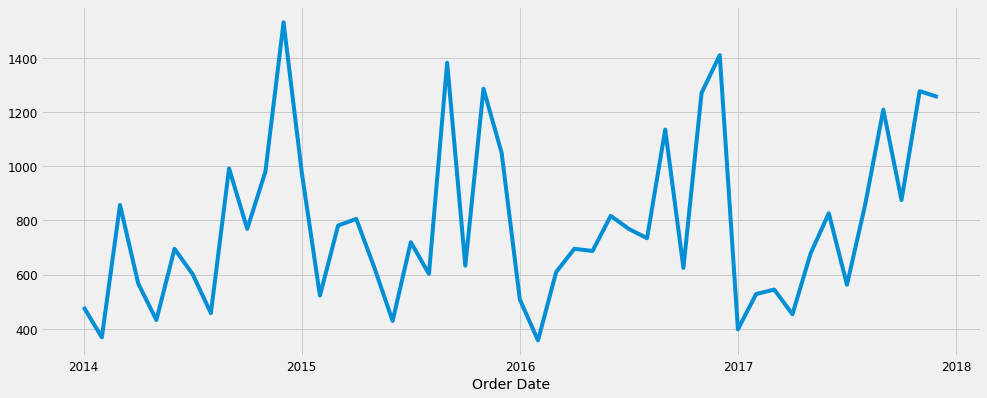

In [16]:
y.plot(figsize=(15, 6))
plt.show()

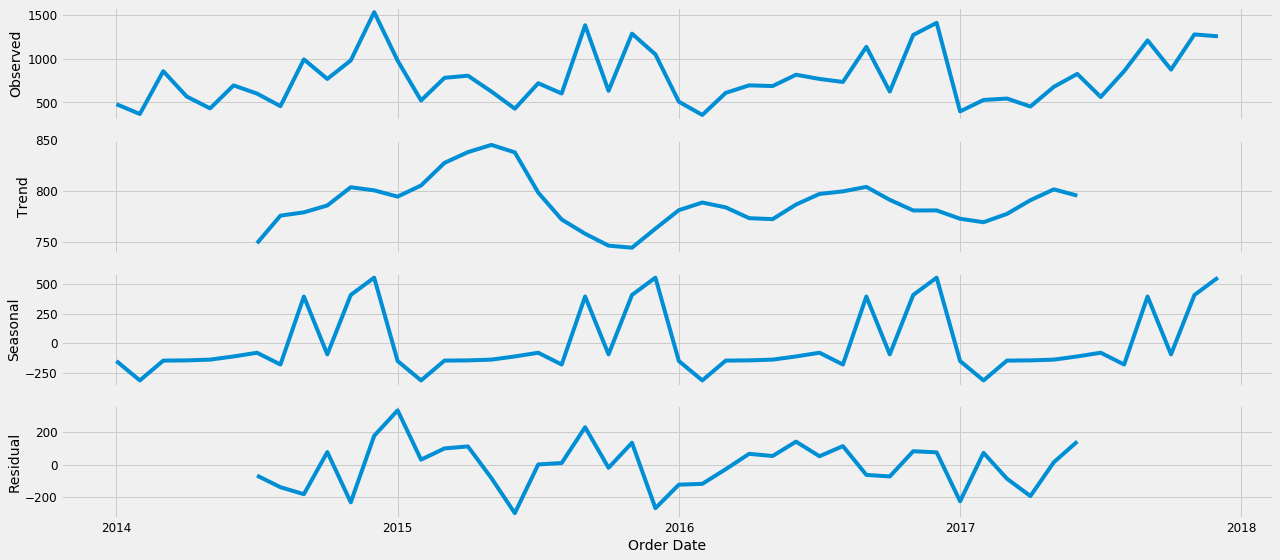

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [18]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [19]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

C:\Users\shahr\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1131.2657078645939
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.23144334183365


C:\Users\shahr\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1001.3915524374769
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758095
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2876.7174897071977
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.56074298091255


C:\Users\shahr\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.54290594685824
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2461.517421827548
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.98848769468657


C:\Users\shahr\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1287.5697512865586
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.78896630044073


C:\Users\shahr\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1388.8924232046936
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109211
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:649.9056176816999
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:3307.7208814993064
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:458.8705548482932
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:486.18329774427826
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2625.602326434297
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:310.75743684172994
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:692.1645522067712


C:\Users\shahr\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1399.3709974017943
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:479.46321478521355
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:480.92593679352177
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1431.0752736869172
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:304.4664675084554
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:665.779444218685
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:246116.34689777798
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:468.3685195814987
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:482.5763323876739
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:3365796.8535189056
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:306.0156002122138
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:671.2513547541902


C:\Users\shahr\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1393.2157168383435
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:479.2003422281134
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:475.34036587848493
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:2102.468501404909
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:300.6270901345443
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:649.0318019835024
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2603.9208285600357
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:460.4762687610111
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:469.52503546608614
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2586.7750340396897
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:297.7875439553055


In [20]:

mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


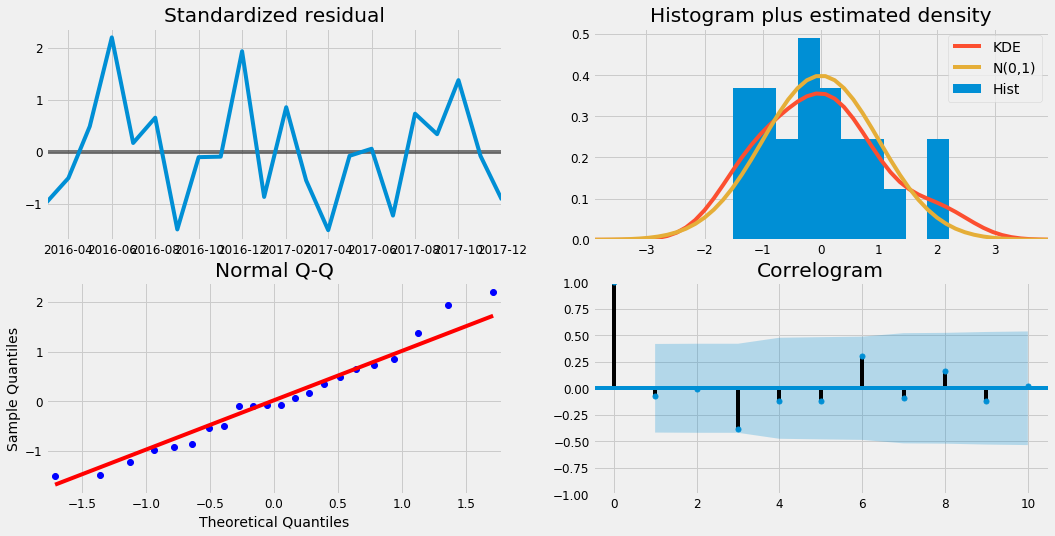

In [21]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

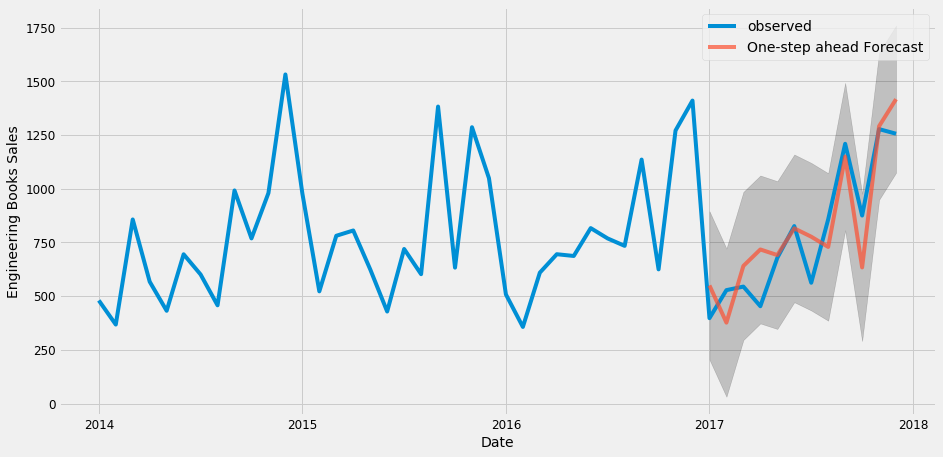

In [22]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Engineering Books Sales')
plt.legend()

plt.show()

In [23]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 22993.58


In [24]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 151.64


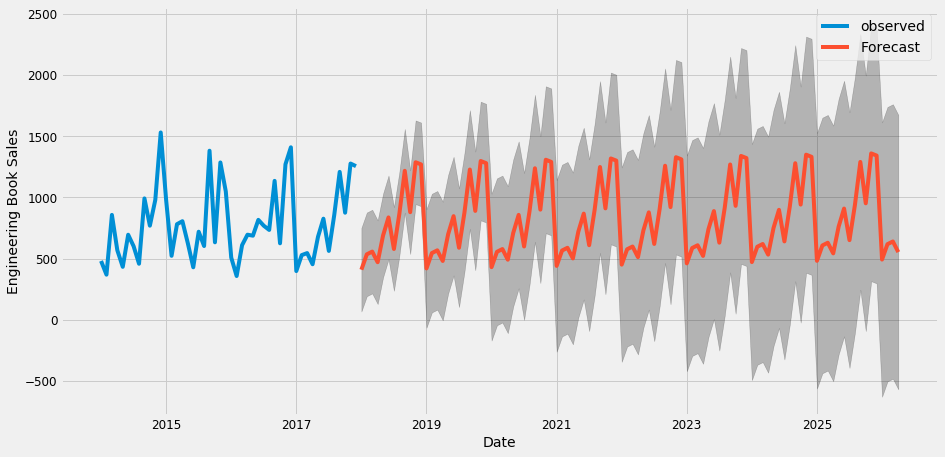

In [25]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Engineering Book Sales')

plt.legend()
plt.show()

Category Wise

Engineering vs Medical

In [26]:
engineering = df.loc[df['Category'] == 'Engineering']
medical = df.loc[df['Category'] == 'Medical']

In [27]:
engineering.shape, medical.shape

((2121, 21), (6026, 21))

In [28]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
engineering.drop(cols, axis=1, inplace=True)
medical.drop(cols, axis=1, inplace=True)

engineering = engineering.sort_values('Order Date')
medical = medical.sort_values('Order Date')

engineering = engineering.groupby('Order Date')['Sales'].sum().reset_index()
medical = medical.groupby('Order Date')['Sales'].sum().reset_index()

In [29]:
medical.head()

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,685.340
4,2014-01-07,10.430


In [30]:
engineering.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


In [31]:
engineering = engineering.set_index('Order Date')
medical = medical.set_index('Order Date')

y_engineering = engineering['Sales'].resample('MS').mean()
y_medical = medical['Sales'].resample('MS').mean()

engineering = pd.DataFrame({'Order Date':y_engineering.index, 'Sales':y_engineering.values})
medical = pd.DataFrame({'Order Date': y_medical.index, 'Sales': y_medical.values})

store = engineering.merge(medical, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'engineering_sales', 'Sales_y': 'medical_sales'}, inplace=True)
store.head()

,Order Date,engineering_sales,medical_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


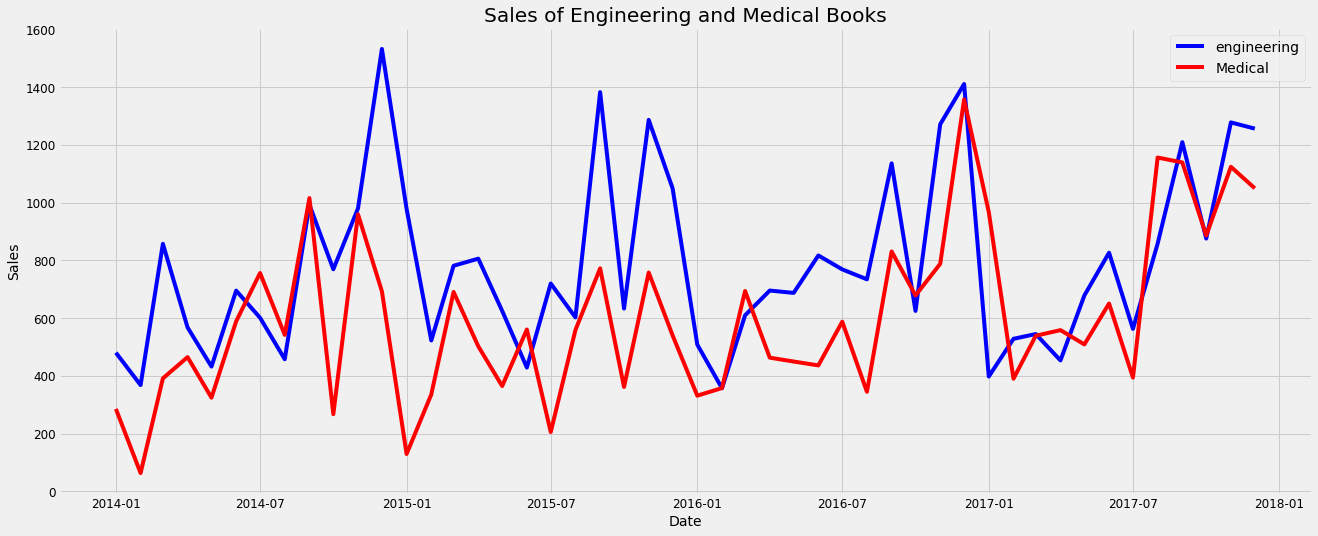

In [32]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['engineering_sales'], 'b-', label = 'engineering')
plt.plot(store['Order Date'], store['medical_sales'], 'r-', label = 'Medical')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Engineering and Medical Books')
plt.legend();

In [33]:
first_date = store.ix[np.min(list(np.where(store['medical_sales'] > store['engineering_sales'])[0])), 'Order Date']

print("Medical Books first time produced higher sales than Engineering Books is {}.".format(first_date.date()))

Medical Books first time produced higher sales than Engineering Books is 2014-07-01.


It was July 2014

Time Series Modeling with Prophet

In [34]:
from fbprophet import Prophet

engineering = engineering.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
engineering_model = Prophet(interval_width=0.95)
engineering_model.fit(engineering)

medical = medical.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
medical_model = Prophet(interval_width=0.95)
medical_model.fit(medical)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [35]:
engineering_forecast = engineering_model.make_future_dataframe(periods=36, freq='MS')
engineering_forecast = engineering_model.predict(engineering_forecast)

medical_forecast = medical_model.make_future_dataframe(periods=36, freq='MS')
medical_forecast = medical_model.predict(medical_forecast)

<Figure size 1296x432 with 0 Axes>

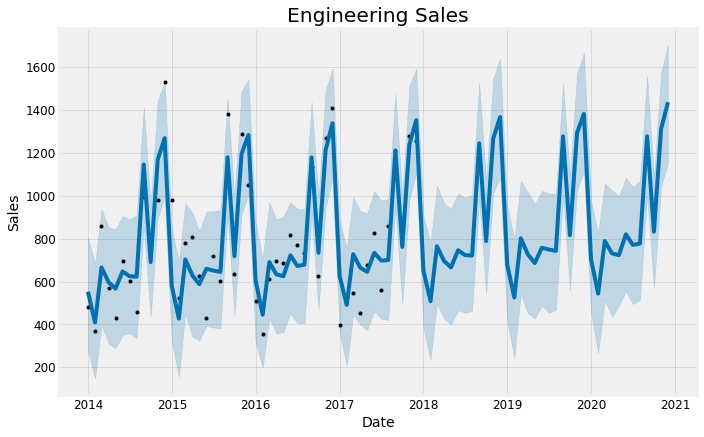

In [36]:
plt.figure(figsize=(18, 6))
engineering_model.plot(engineering_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Engineering Sales');

<Figure size 1296x432 with 0 Axes>

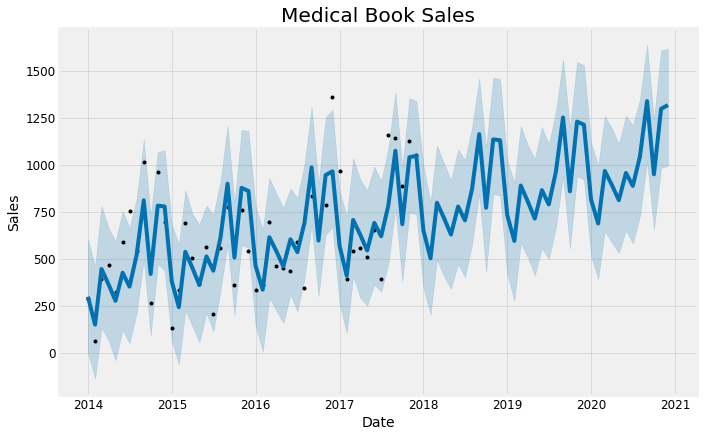

In [37]:
plt.figure(figsize=(18, 6))
medical_model.plot(medical_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Medical Book Sales');

Compare Forecasts
We already have the forecasts for three years for these two categories into the future. We will now join them together to compare their future forecasts

In [55]:
engineering_names = ['engineering_%s' % column for column in engineering_forecast.columns]
medical_names = ['medical_%s' % column for column in medical_forecast.columns]

merge_engineering_forecast = engineering_forecast.copy()
merge_medical_forecast = medical_forecast.copy()

merge_engineering_forecast.columns = engineering_names
merge_medical_forecast.columns = medical_names

forecast = pd.merge(merge_engineering_forecast, merge_medical_forecast, how = 'inner', left_on = 'engineering_ds', right_on = 'medical_ds')

forecast = forecast.rename(columns={'engineering_ds': 'Date'}).drop('medical_ds', axis=1)
forecast.head()

,Date,engineering_trend,engineering_trend_lower,engineering_trend_upper,engineering_yhat_lower,engineering_yhat_upper,engineering_additive_terms,engineering_additive_terms_lower,engineering_additive_terms_upper,engineering_multiplicative_terms,...,medical_additive_terms,medical_additive_terms_lower,medical_additive_terms_upper,medical_multiplicative_terms,medical_multiplicative_terms_lower,medical_multiplicative_terms_upper,medical_yearly,medical_yearly_lower,medical_yearly_upper,medical_yhat
0,2014-01-01,731.079361,731.079361,731.079361,277.362249,806.260728,-178.836100,-178.836100,-178.836100,0.0,...,-132.483942,-132.483942,-132.483942,0.0,0.0,0.0,-132.483942,-132.483942,-132.483942,297.865749
1,2014-02-01,733.206972,733.206972,733.206972,146.855985,683.032758,-324.048145,-324.048145,-324.048145,0.0,...,-288.226070,-288.226070,-288.226070,0.0,0.0,0.0,-288.226070,-288.226070,-288.226070,149.595672
2,2014-03-01,735.128684,735.128684,735.128684,396.458187,938.645186,-69.406915,-69.406915,-69.406915,0.0,...,0.829065,0.829065,0.829065,0.0,0.0,0.0,0.829065,0.829065,0.829065,445.399757
3,2014-04-01,737.256294,737.256294,737.256294,310.080236,852.698770,-140.477169,-140.477169,-140.477169,0.0,...,-89.156127,-89.156127,-89.156127,0.0,0.0,0.0,-89.156127,-89.156127,-89.156127,362.886617
4,2014-05-01,739.315271,739.315271,739.315271,288.921928,843.742074,-172.355011,-172.355011,-172.355011,0.0,...,-183.195734,-183.195734,-183.195734,0.0,0.0,0.0,-183.195734,-183.195734,-183.195734,276.078026


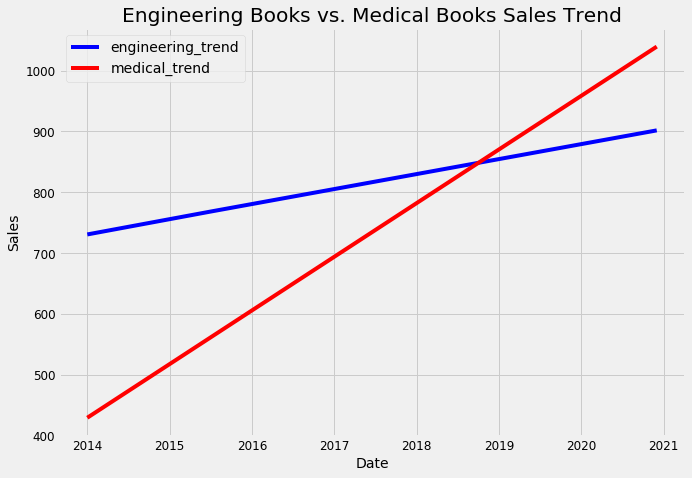

In [57]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['engineering_trend'], 'b-')
plt.plot(forecast['Date'], forecast['medical_trend'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Engineering Books vs. Medical Books Sales Trend');

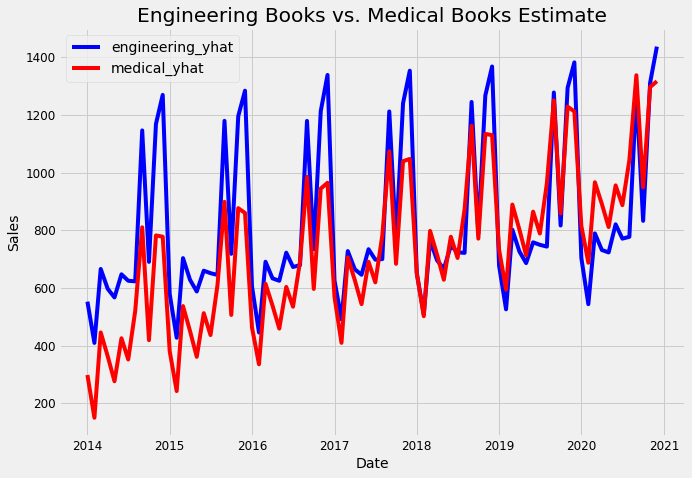

In [59]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['engineering_yhat'], 'b-')
plt.plot(forecast['Date'], forecast['medical_yhat'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Engineering Books vs. Medical Books Estimate');

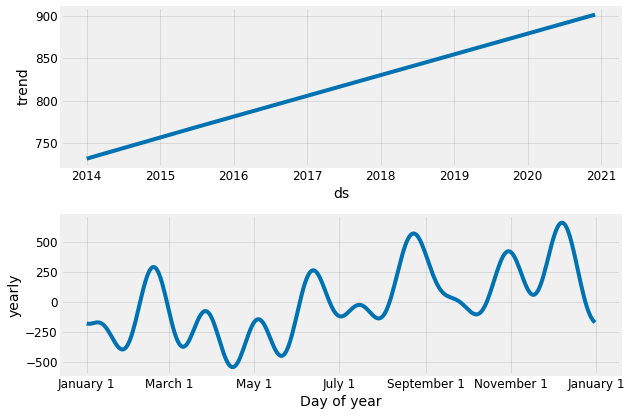

In [60]:
engineering_model.plot_components(engineering_forecast);

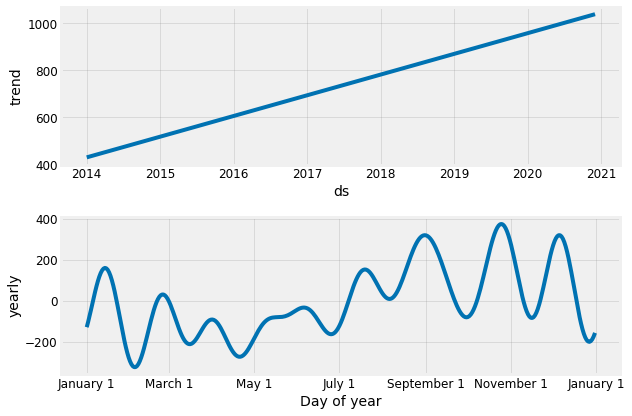

In [61]:
medical_model.plot_components(medical_forecast);

Good to see that the sales for both Engineering and Medical Books have been linearly increasing over time although Medical Books sales' growth seems slightly stronger.

The worst month for Engineering is April, the worst month for Medical Books is February. The best month for Engineering is December, and the best month for Medical Books is November.